# GelMA SMPEG2

In [2]:
import pandas as pd

In [3]:
from sklearn import preprocessing

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters and Data Import

In [5]:
pi = 3.141592653589793238

In [7]:
GelMA6 = pd.read_csv("GelMA6.csv")
GelMA6_H = 3.73
GelMA6_D = 16.62/1000
GelMA6_R = GelMA6_D/2

GelMA7 = pd.read_csv("GelMA7.csv")
GelMA7_H = 3.42
GelMA7_D = 17.32/1000
GelMA7_R = GelMA7_D/2

GelMA8 = pd.read_csv("GelMA8.csv")
GelMA8_H = 3.50
GelMA8_D = 17.15/1000
GelMA8_R = GelMA8_D/2

GelMA9 = pd.read_csv("GelMA9.csv")
GelMA9_H = 3.34
GelMA9_D = 16.81/1000
GelMA9_R = GelMA9_D/2

GelMA10 = pd.read_csv("GelMA10.csv")
GelMA10_H = 3.28
GelMA10_D = 17.33/1000
GelMA10_R = GelMA10_D/2


In [8]:
GelMA6.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA7.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA8.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA9.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA10.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

In [9]:
GelMA10

,Time [sec],Force [N],Stroke [mm]
0,0.00,-0.003656,0.000000
1,0.01,-0.002623,0.000000
2,0.02,-0.002861,0.000033
3,0.03,-0.003497,0.000067
4,0.04,-0.003417,0.000100
...,...,...,...
16046,160.46,11.981410,2.674300
16047,160.47,11.974650,2.674500
16048,160.48,11.969330,2.674633
16049,160.49,11.966310,2.674767


## Stress and Strain Calculation

In [10]:
GelMA6['Engineering Strain'] = GelMA6['Stroke [mm]']/ GelMA6_H 
GelMA6['Stress [Pa]'] = GelMA6['Force [N]']/(pi*GelMA6_R**2)

GelMA7['Engineering Strain'] = GelMA7['Stroke [mm]']/ GelMA7_H 
GelMA7['Stress [Pa]'] = GelMA7['Force [N]']/(pi*GelMA7_R**2)

GelMA8['Engineering Strain'] = GelMA8['Stroke [mm]']/ GelMA8_H 
GelMA8['Stress [Pa]'] = GelMA8['Force [N]']/(pi*GelMA8_R**2)

GelMA9['Engineering Strain'] = GelMA9['Stroke [mm]']/ GelMA9_H 
GelMA9['Stress [Pa]'] = GelMA9['Force [N]']/(pi*GelMA9_R**2)

GelMA10['Engineering Strain'] = GelMA10['Stroke [mm]']/ GelMA10_H 
GelMA10['Stress [Pa]'] = GelMA10['Force [N]']/(pi*GelMA10_R**2)



GelMA6['Engineering Strain'] = GelMA6['Stroke [mm]']/ GelMA6_H 
GelMA6['Stress [kPa]'] = (GelMA6['Force [N]']/(pi*GelMA6_R**2))/1000

GelMA7['Engineering Strain'] = GelMA7['Stroke [mm]']/ GelMA7_H 
GelMA7['Stress [kPa]'] = (GelMA7['Force [N]']/(pi*GelMA7_R**2))/1000

GelMA8['Engineering Strain'] = GelMA8['Stroke [mm]']/ GelMA8_H 
GelMA8['Stress [kPa]'] = (GelMA8['Force [N]']/(pi*GelMA8_R**2))/1000

GelMA9['Engineering Strain'] = GelMA9['Stroke [mm]']/ GelMA9_H 
GelMA9['Stress [kPa]'] = (GelMA9['Force [N]']/(pi*GelMA9_R**2))/1000

GelMA10['Engineering Strain'] = GelMA10['Stroke [mm]']/ GelMA10_H 
GelMA10['Stress [kPa]'] = (GelMA10['Force [N]']/(pi*GelMA10_R**2))/1000

In [11]:
GelMA10

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa]
0,0.00,-0.003656,0.000000,0.000000,-15.498498,-0.015498
1,0.01,-0.002623,0.000000,0.000000,-11.118488,-0.011118
2,0.02,-0.002861,0.000033,0.000010,-12.129261,-0.012129
3,0.03,-0.003497,0.000067,0.000020,-14.824653,-0.014825
4,0.04,-0.003417,0.000100,0.000030,-14.487728,-0.014488
...,...,...,...,...,...,...
16046,160.46,11.981410,2.674300,0.815335,50794.995133,50.794995
16047,160.47,11.974650,2.674500,0.815396,50766.336221,50.766336
16048,160.48,11.969330,2.674633,0.815437,50743.782167,50.743782
16049,160.49,11.966310,2.674767,0.815478,50730.978925,50.730979


## Cutting the Data 

In [12]:
GelMA6_cut = GelMA6[~(GelMA6['Force [N]']<= 0.15)]

GelMA7_cut = GelMA7[~(GelMA7['Force [N]']<= 0.15)]

GelMA8_cut = GelMA8[~(GelMA8['Force [N]']<= 0.15)]

GelMA9_cut = GelMA9[~(GelMA9['Force [N]']<= 0.15)]

GelMA10_cut = GelMA10[~(GelMA10['Force [N]']<= 0.15)]

In [13]:
GelMA10_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa]
2777,27.77,0.150045,0.462800,0.141098,636.112518,0.636113
2782,27.82,0.150522,0.463633,0.141352,638.133904,0.638134
2783,27.83,0.150442,0.463800,0.141402,637.796865,0.637797
2785,27.85,0.150442,0.464133,0.141504,637.796865,0.637797
2786,27.86,0.151475,0.464267,0.141545,642.177100,0.642177
...,...,...,...,...,...,...
16046,160.46,11.981410,2.674300,0.815335,50794.995133,50.794995
16047,160.47,11.974650,2.674500,0.815396,50766.336221,50.766336
16048,160.48,11.969330,2.674633,0.815437,50743.782167,50.743782
16049,160.49,11.966310,2.674767,0.815478,50730.978925,50.730979


In [14]:
GelMA6_cut['Strain Normalised'] = GelMA6_cut['Engineering Strain'] - GelMA6_cut.iloc[0]['Engineering Strain']

GelMA7_cut['Strain Normalised'] = GelMA7_cut['Engineering Strain'] - GelMA7_cut.iloc[0]['Engineering Strain']

GelMA8_cut['Strain Normalised'] = GelMA8_cut['Engineering Strain'] - GelMA8_cut.iloc[0]['Engineering Strain']

GelMA9_cut['Strain Normalised'] = GelMA9_cut['Engineering Strain'] - GelMA9_cut.iloc[0]['Engineering Strain']

GelMA10_cut['Strain Normalised'] = GelMA10_cut['Engineering Strain'] - GelMA10_cut.iloc[0]['Engineering Strain']

GelMA10_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/3454186687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA6_cut['Strain Normalised'] = GelMA6_cut['Engineering Strain'] - GelMA6_cut.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/3454186687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA7_cut['Strain Normalised'] = GelMA7_cut['Engineering Strain'] - GelMA7_cut.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0yr67c2w

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised
2777,27.77,0.150045,0.462800,0.141098,636.112518,0.636113,0.000000
2782,27.82,0.150522,0.463633,0.141352,638.133904,0.638134,0.000254
2783,27.83,0.150442,0.463800,0.141402,637.796865,0.637797,0.000305
2785,27.85,0.150442,0.464133,0.141504,637.796865,0.637797,0.000407
2786,27.86,0.151475,0.464267,0.141545,642.177100,0.642177,0.000447
...,...,...,...,...,...,...,...
16046,160.46,11.981410,2.674300,0.815335,50794.995133,50.794995,0.674238
16047,160.47,11.974650,2.674500,0.815396,50766.336221,50.766336,0.674299
16048,160.48,11.969330,2.674633,0.815437,50743.782167,50.743782,0.674339
16049,160.49,11.966310,2.674767,0.815478,50730.978925,50.730979,0.674380


In [15]:
GelMA6_cut['Stroke Normalised'] = GelMA6_cut['Stroke [mm]'] - GelMA6_cut.iloc[0]['Stroke [mm]']

GelMA7_cut['Stroke Normalised'] = GelMA7_cut['Stroke [mm]'] - GelMA7_cut.iloc[0]['Stroke [mm]']

GelMA8_cut['Stroke Normalised'] = GelMA8_cut['Stroke [mm]'] - GelMA8_cut.iloc[0]['Stroke [mm]']

GelMA9_cut['Stroke Normalised'] = GelMA9_cut['Stroke [mm]'] - GelMA9_cut.iloc[0]['Stroke [mm]']

GelMA10_cut['Stroke Normalised'] = GelMA10_cut['Stroke [mm]'] - GelMA10_cut.iloc[0]['Stroke [mm]']

GelMA10_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/2406515393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA6_cut['Stroke Normalised'] = GelMA6_cut['Stroke [mm]'] - GelMA6_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/2406515393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA7_cut['Stroke Normalised'] = GelMA7_cut['Stroke [mm]'] - GelMA7_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/24

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised
2777,27.77,0.150045,0.462800,0.141098,636.112518,0.636113,0.000000,0.000000
2782,27.82,0.150522,0.463633,0.141352,638.133904,0.638134,0.000254,0.000833
2783,27.83,0.150442,0.463800,0.141402,637.796865,0.637797,0.000305,0.001000
2785,27.85,0.150442,0.464133,0.141504,637.796865,0.637797,0.000407,0.001333
2786,27.86,0.151475,0.464267,0.141545,642.177100,0.642177,0.000447,0.001467
...,...,...,...,...,...,...,...,...
16046,160.46,11.981410,2.674300,0.815335,50794.995133,50.794995,0.674238,2.211500
16047,160.47,11.974650,2.674500,0.815396,50766.336221,50.766336,0.674299,2.211700
16048,160.48,11.969330,2.674633,0.815437,50743.782167,50.743782,0.674339,2.211833
16049,160.49,11.966310,2.674767,0.815478,50730.978925,50.730979,0.674380,2.211967


### Plotting Force and Stroke Normalised 

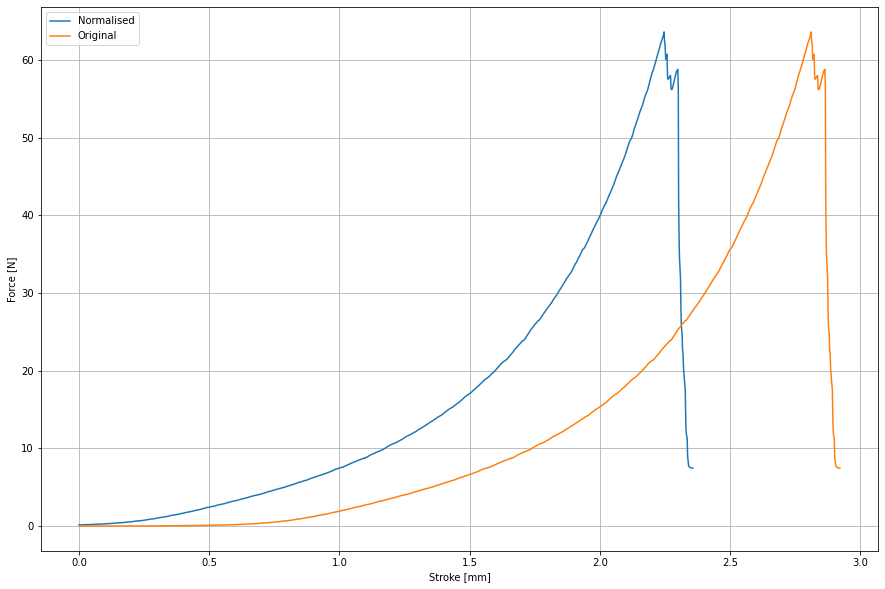

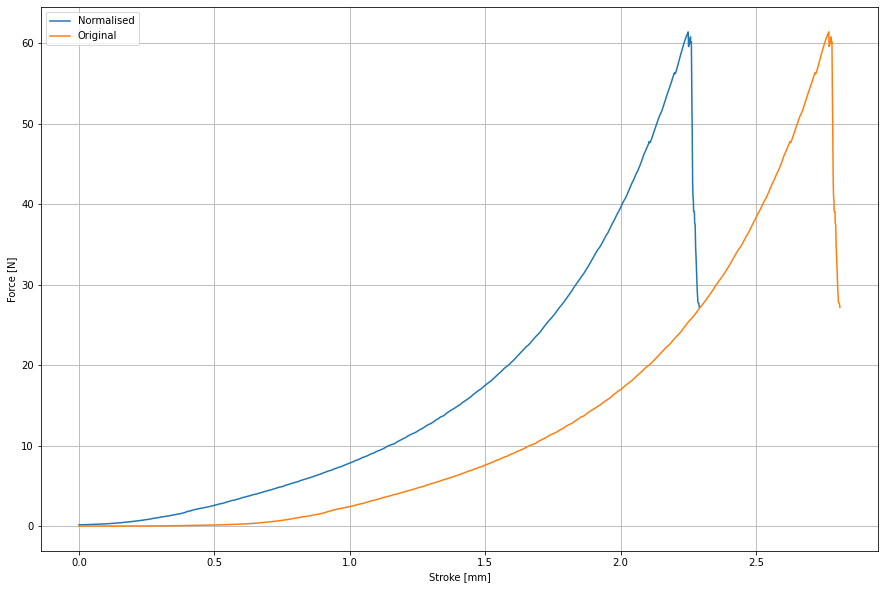

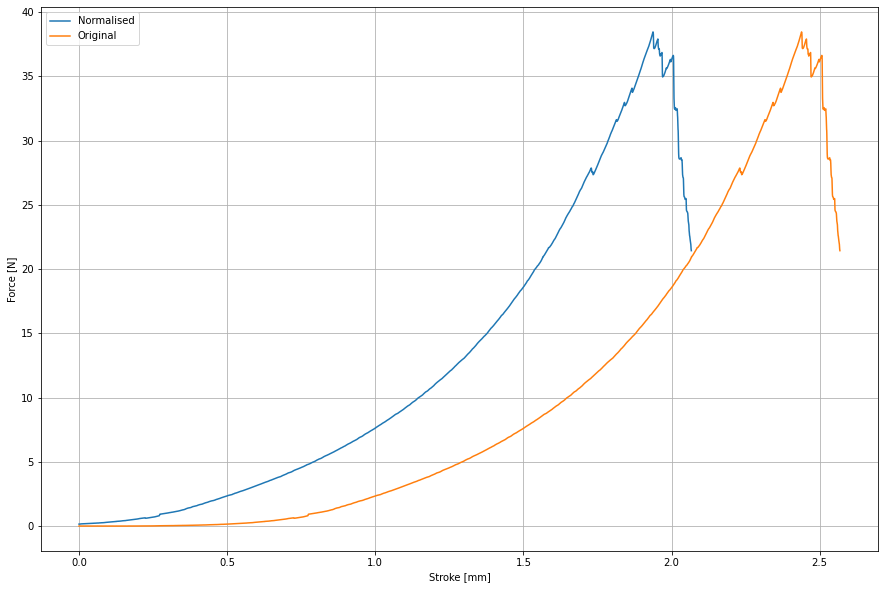

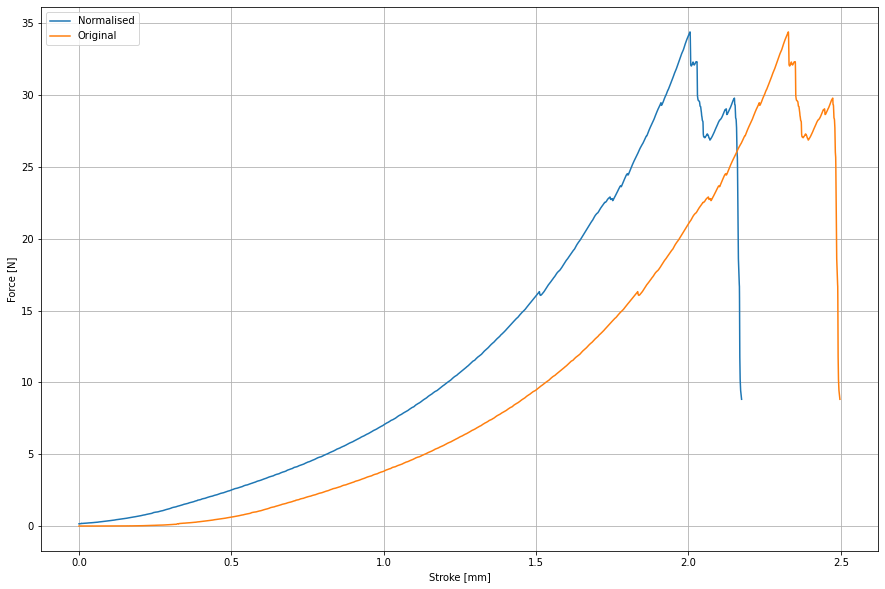

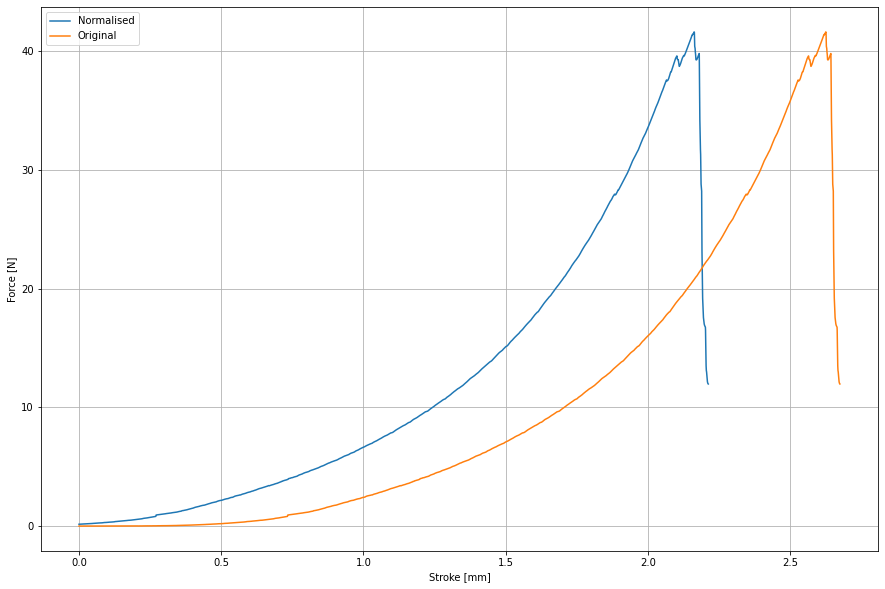

In [16]:
axA = GelMA6_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA6.plot(ax = axA, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()


axB = GelMA7_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA7.plot(ax = axB, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axC = GelMA8_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA8.plot(ax = axC, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axD = GelMA9_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA9.plot(ax = axD, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axE = GelMA10_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA10.plot(ax = axE, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()


### Plotting Stress and Strain Normalised 

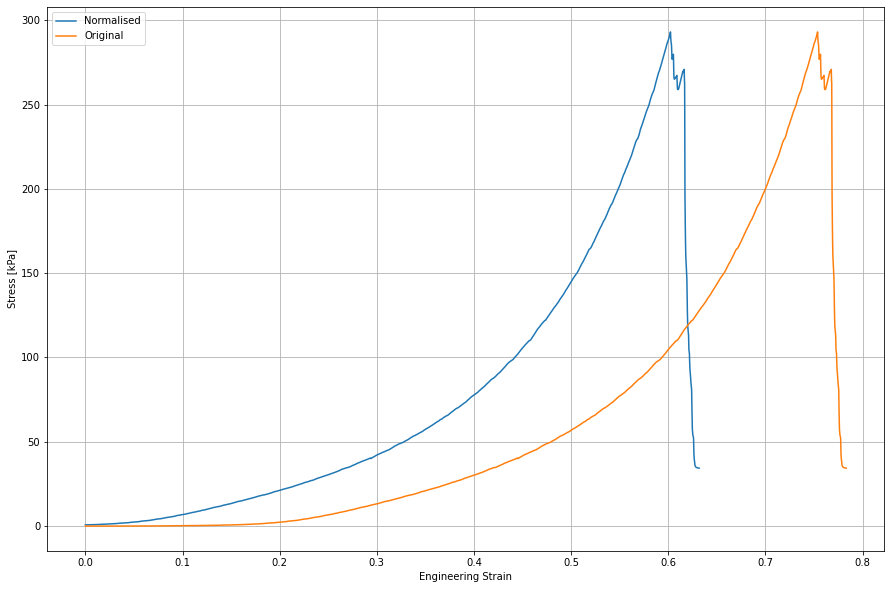

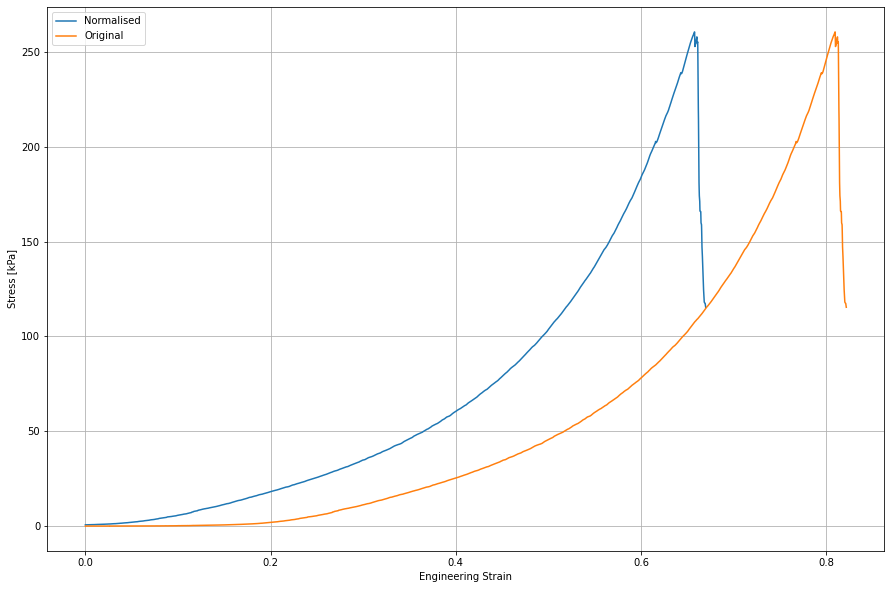

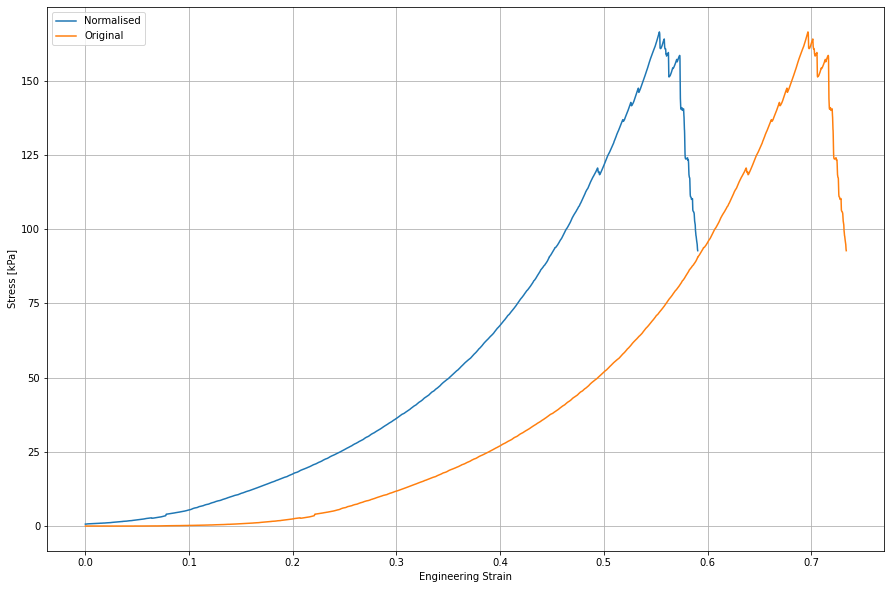

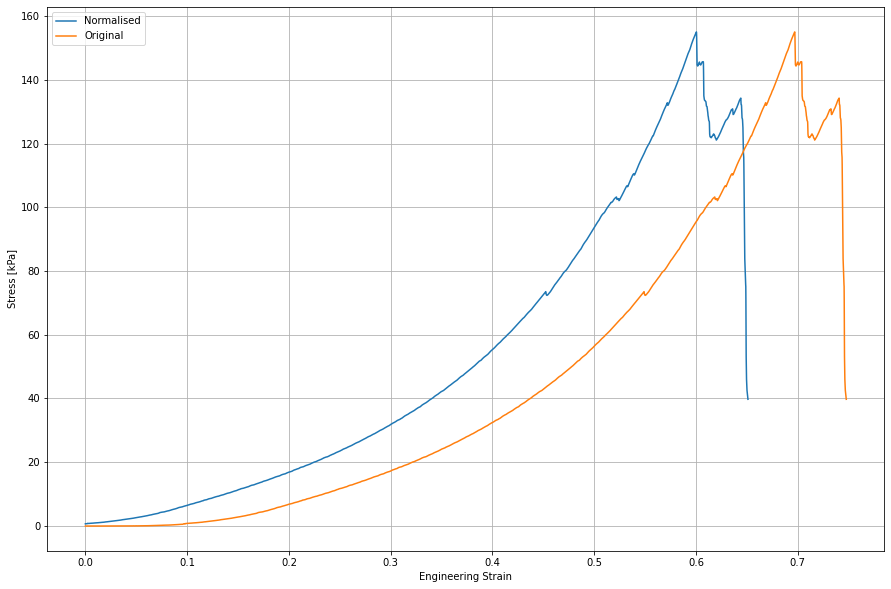

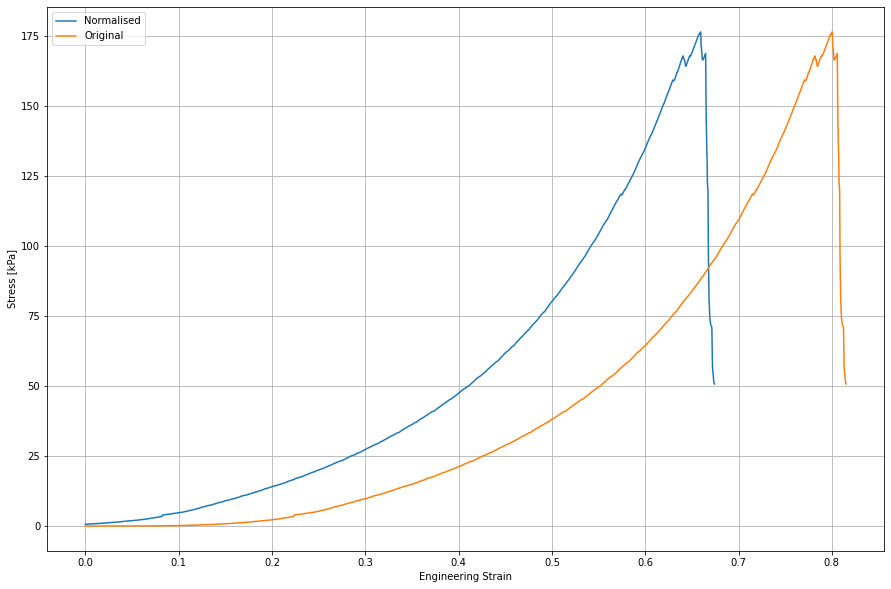

In [18]:
ax = GelMA6_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA6.plot(ax = ax, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax1 = GelMA7_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA7.plot(ax = ax1, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax2 = GelMA8_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA8.plot(ax = ax2, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax3 = GelMA9_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA9.plot(ax = ax3, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax4 = GelMA10_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA10.plot(ax = ax4, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()

## All Graphs of GelMA only (Normalised)_Non-max-cut 

### Force Stroke Plots (All)_Non-cut

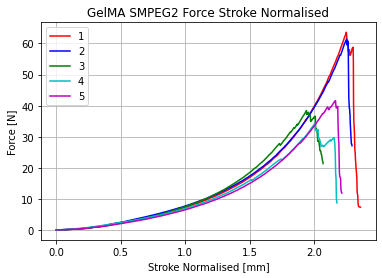

In [19]:
plt.plot(GelMA6_cut['Stroke Normalised'],GelMA6_cut['Force [N]'],color = 'r')
plt.plot(GelMA7_cut['Stroke Normalised'],GelMA7_cut['Force [N]'],color = 'b')
plt.plot(GelMA8_cut['Stroke Normalised'],GelMA8_cut['Force [N]'],color = 'g')
plt.plot(GelMA9_cut['Stroke Normalised'],GelMA9_cut['Force [N]'],color = 'c')
plt.plot(GelMA10_cut['Stroke Normalised'],GelMA10_cut['Force [N]'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA SMPEG2 Force Stroke Normalised')
plt.xlabel('Stroke Normalised [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA SMPEG2_FS_Non-max-cut.png")
plt.show()


### Stress Strain Plots (All)_Non-cut

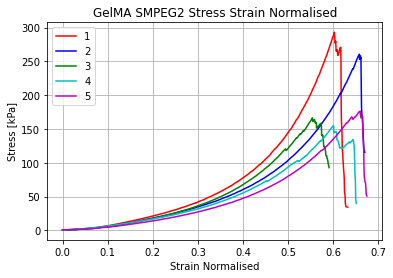

In [21]:
plt.plot(GelMA6_cut['Strain Normalised'],GelMA6_cut['Stress [kPa]'],color = 'r')
plt.plot(GelMA7_cut['Strain Normalised'],GelMA7_cut['Stress [kPa]'],color = 'b')
plt.plot(GelMA8_cut['Strain Normalised'],GelMA8_cut['Stress [kPa]'],color = 'g')
plt.plot(GelMA9_cut['Strain Normalised'],GelMA9_cut['Stress [kPa]'],color = 'c')
plt.plot(GelMA10_cut['Strain Normalised'],GelMA10_cut['Stress [kPa]'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA SMPEG2 Stress Strain Normalised')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA SMPEG2_SS_Non-max-cut.png")
plt.show()


#norm_GelMA_Only = {'GelMA31_norm':GelMA31_cut['Strain Normalised'],
#                   'GelMA32_norm':GelMA32_cut['Strain Normalised'],
#                   'GelMA33_norm':GelMA33_cut['Strain Normalised'],
#                   'GelM34_norm':GelMA34_cut['Strain Normalised'],
#                   'GelMA35_norm':GelMA35_cut['Strain Normalised']}

#df_only = pd.DataFrame(norm_GelMA_Only)

#print(df_only)

In [100]:
GelMA10_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Strain Normalised,Stroke Normalised
2777,27.77,0.150045,0.462800,0.141098,636.112518,0.000000,0.000000
2782,27.82,0.150522,0.463633,0.141352,638.133904,0.000254,0.000833
2783,27.83,0.150442,0.463800,0.141402,637.796865,0.000305,0.001000
2785,27.85,0.150442,0.464133,0.141504,637.796865,0.000407,0.001333
2786,27.86,0.151475,0.464267,0.141545,642.177100,0.000447,0.001467
...,...,...,...,...,...,...,...
16046,160.46,11.981410,2.674300,0.815335,50794.995133,0.674238,2.211500
16047,160.47,11.974650,2.674500,0.815396,50766.336221,0.674299,2.211700
16048,160.48,11.969330,2.674633,0.815437,50743.782167,0.674339,2.211833
16049,160.49,11.966310,2.674767,0.815478,50730.978925,0.674380,2.211967


## Max cutting

### GelMA6 Force and Stress

In [22]:
maxForceIndex6 = float(GelMA6_cut['Force [N]'].idxmax()) #position
maxStrokeIndex6 = float(GelMA6_cut['Stroke [mm]'].idxmax())

GelMA6_cut_max_FS = GelMA6_cut.loc[0:maxForceIndex6, 'Force [N]']

GelMA6_cut['Force Cut Max FS'] = GelMA6_cut_max_FS
GelMA6_cut

##Stress

maxStressIndex6 = float(GelMA6_cut['Stress [kPa]'].idxmax())
maxStrainIndex6 = float(GelMA6_cut['Strain Normalised'].idxmax())
 
GelMA6_cut_max_SS = GelMA6_cut.loc[0:maxStressIndex6, 'Stress [kPa]']

GelMA6_cut['Stress Cut Max SS'] = GelMA6_cut_max_SS

GelMA6_cut

#GelMA6_cut.drop('Stroke Normalised Max FS', axis=1, inplace=True)
#GelMA6_cut.drop('Strain Normalised Max SS', axis=1, inplace=True)

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/2698906874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA6_cut['Force Cut Max FS'] = GelMA6_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/2698906874.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA6_cut['Stress Cut Max SS'] = GelMA6_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3389,33.89,0.150045,0.564800,0.151421,691.622365,0.691622,0.000000,0.000000,0.150045,0.691622
3402,34.02,0.150045,0.566967,0.152002,691.622365,0.691622,0.000581,0.002167,0.150045,0.691622
3404,34.04,0.150045,0.567300,0.152091,691.622365,0.691622,0.000670,0.002500,0.150045,0.691622
3405,34.05,0.151078,0.567433,0.152127,696.384377,0.696384,0.000706,0.002633,0.151078,0.696384
3406,34.06,0.152191,0.567600,0.152172,701.512839,0.701513,0.000751,0.002800,0.152191,0.701513
...,...,...,...,...,...,...,...,...,...,...
17527,175.27,7.454395,2.921100,0.783137,34360.579645,34.360580,0.631716,2.356300,NaN,NaN
17528,175.28,7.455349,2.921267,0.783182,34364.977050,34.364977,0.631761,2.356467,NaN,NaN
17529,175.29,7.456303,2.921400,0.783217,34369.374455,34.369374,0.631796,2.356600,NaN,NaN
17530,175.30,7.457098,2.921500,0.783244,34373.038959,34.373039,0.631823,2.356700,NaN,NaN


### GelMA7 Force and Stress

In [23]:
maxForceIndex7 = float(GelMA7_cut['Force [N]'].idxmax()) #position
maxStrokeIndex7 = float(GelMA7_cut['Stroke [mm]'].idxmax())

GelMA7_cut_max_FS = GelMA7_cut.loc[0:maxForceIndex7, 'Force [N]']

GelMA7_cut['Force Cut Max FS'] = GelMA7_cut_max_FS
GelMA7_cut

##Stress

maxStressIndex7 = float(GelMA7_cut['Stress [kPa]'].idxmax())
maxStrainIndex7 = float(GelMA7_cut['Strain Normalised'].idxmax())
 
GelMA7_cut_max_SS = GelMA7_cut.loc[0:maxStressIndex7, 'Stress [kPa]']

GelMA7_cut['Stress Cut Max SS'] = GelMA7_cut_max_SS

GelMA7_cut


/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/3767237977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA7_cut['Force Cut Max FS'] = GelMA7_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/3767237977.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA7_cut['Stress Cut Max SS'] = GelMA7_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3115,31.15,0.150124,0.519067,0.151774,637.184275,0.637184,0.000000,0.000000,0.150124,0.637184
3116,31.16,0.150522,0.519267,0.151832,638.870992,0.638871,0.000058,0.000200,0.150522,0.638871
3117,31.17,0.150680,0.519400,0.151871,639.545424,0.639545,0.000097,0.000333,0.150680,0.639545
3118,31.18,0.150283,0.519600,0.151930,637.859132,0.637859,0.000156,0.000533,0.150283,0.637859
3123,31.23,0.151873,0.520400,0.152164,644.605150,0.644605,0.000390,0.001333,0.151873,0.644605
...,...,...,...,...,...,...,...,...,...,...
16855,168.55,27.271750,2.809100,0.821374,115751.692613,115.751693,0.669600,2.290033,NaN,NaN
16856,168.56,27.237020,2.809233,0.821413,115604.285267,115.604285,0.669639,2.290166,NaN,NaN
16857,168.57,27.215560,2.809433,0.821472,115513.200855,115.513201,0.669698,2.290366,NaN,NaN
16858,168.58,27.198710,2.809567,0.821511,115441.683038,115.441683,0.669737,2.290500,NaN,NaN


### GelMA8 Force and Stress

In [24]:
maxForceIndex8 = float(GelMA8_cut['Force [N]'].idxmax()) #position
maxStrokeIndex8 = float(GelMA8_cut['Stroke [mm]'].idxmax())

GelMA8_cut_max_FS = GelMA8_cut.loc[0:maxForceIndex8, 'Force [N]']

GelMA8_cut['Force Cut Max FS'] = GelMA8_cut_max_FS
GelMA8_cut

##Stress

maxStressIndex8 = float(GelMA8_cut['Stress [kPa]'].idxmax())
maxStrainIndex8 = float(GelMA8_cut['Strain Normalised'].idxmax())
 
GelMA8_cut_max_SS = GelMA8_cut.loc[0:maxStressIndex8, 'Stress [kPa]']

GelMA8_cut['Stress Cut Max SS'] = GelMA8_cut_max_SS

GelMA8_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/3265366953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA8_cut['Force Cut Max FS'] = GelMA8_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/3265366953.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA8_cut['Stress Cut Max SS'] = GelMA8_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3009,30.09,0.150283,0.501467,0.143276,650.567410,0.650567,0.000000,0.000000,0.150283,0.650567
3010,30.10,0.151237,0.501633,0.143324,654.695490,0.654695,0.000048,0.000167,0.151237,0.654695
3011,30.11,0.151873,0.501767,0.143362,657.447832,0.657448,0.000086,0.000300,0.151873,0.657448
3012,30.12,0.151237,0.501933,0.143410,654.695490,0.654695,0.000133,0.000467,0.151237,0.654695
3016,30.16,0.151396,0.502667,0.143619,655.383792,0.655384,0.000343,0.001200,0.151396,0.655384
...,...,...,...,...,...,...,...,...,...,...
15407,154.07,21.520610,2.567767,0.733648,93161.494543,93.161495,0.590372,2.066300,NaN,NaN
15408,154.08,21.493350,2.567967,0.733705,93043.487556,93.043488,0.590429,2.066500,NaN,NaN
15409,154.09,21.468880,2.568133,0.733752,92937.558321,92.937558,0.590476,2.066666,NaN,NaN
15410,154.10,21.450760,2.568267,0.733791,92859.117873,92.859118,0.590514,2.066800,NaN,NaN


### GelMA9 Force and Stress

In [25]:
maxForceIndex9 = float(GelMA9_cut['Force [N]'].idxmax()) #position
maxStrokeIndex9 = float(GelMA9_cut['Stroke [mm]'].idxmax())

GelMA9_cut_max_FS = GelMA9_cut.loc[0:maxForceIndex9, 'Force [N]']

GelMA9_cut['Force Cut Max FS'] = GelMA9_cut_max_FS
GelMA9_cut

##Stress

maxStressIndex9 = float(GelMA9_cut['Stress [kPa]'].idxmax())
maxStrainIndex9 = float(GelMA9_cut['Strain Normalised'].idxmax())
 
GelMA9_cut_max_SS = GelMA9_cut.loc[0:maxStressIndex9, 'Stress [kPa]']

GelMA9_cut['Stress Cut Max SS'] = GelMA9_cut_max_SS

GelMA9_cut


/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/2032010268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA9_cut['Force Cut Max FS'] = GelMA9_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/2032010268.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA9_cut['Stress Cut Max SS'] = GelMA9_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
1936,19.36,0.150124,0.322633,0.096597,676.433952,0.676434,0.000000,0.000000,0.150124,0.676434
1937,19.37,0.150839,0.322767,0.096637,679.656971,0.679657,0.000040,0.000133,0.150839,0.679657
1938,19.38,0.150045,0.322933,0.096687,676.076189,0.676076,0.000090,0.000300,0.150045,0.676076
1940,19.40,0.150283,0.323233,0.096776,677.150379,0.677150,0.000180,0.000600,0.150283,0.677150
1941,19.41,0.152191,0.323400,0.096826,685.744346,0.685744,0.000230,0.000767,0.152191,0.685744
...,...,...,...,...,...,...,...,...,...,...
14979,149.79,8.910100,2.496467,0.747445,40147.385669,40.147386,0.650848,2.173834,NaN,NaN
14980,149.80,8.884828,2.496633,0.747495,40033.514362,40.033514,0.650898,2.174000,NaN,NaN
14981,149.81,8.862734,2.496800,0.747545,39933.962580,39.933963,0.650948,2.174167,NaN,NaN
14982,149.82,8.842468,2.496867,0.747565,39842.647452,39.842647,0.650968,2.174234,NaN,NaN


### GelMA10 Force and Stress 

In [26]:
maxForceIndex10 = float(GelMA10_cut['Force [N]'].idxmax()) #position
maxStrokeIndex10 = float(GelMA10_cut['Stroke [mm]'].idxmax())

GelMA10_cut_max_FS = GelMA10_cut.loc[0:maxForceIndex10, 'Force [N]']

GelMA10_cut['Force Cut Max FS'] = GelMA10_cut_max_FS
GelMA10_cut

##Stress

maxStressIndex10 = float(GelMA10_cut['Stress [kPa]'].idxmax())
maxStrainIndex10 = float(GelMA10_cut['Strain Normalised'].idxmax())
 
GelMA10_cut_max_SS = GelMA10_cut.loc[0:maxStressIndex10, 'Stress [kPa]']

GelMA10_cut['Stress Cut Max SS'] = GelMA10_cut_max_SS

GelMA10_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/2632382651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA10_cut['Force Cut Max FS'] = GelMA10_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/2632382651.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA10_cut['Stress Cut Max SS'] = GelMA10_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
2777,27.77,0.150045,0.462800,0.141098,636.112518,0.636113,0.000000,0.000000,0.150045,0.636113
2782,27.82,0.150522,0.463633,0.141352,638.133904,0.638134,0.000254,0.000833,0.150522,0.638134
2783,27.83,0.150442,0.463800,0.141402,637.796865,0.637797,0.000305,0.001000,0.150442,0.637797
2785,27.85,0.150442,0.464133,0.141504,637.796865,0.637797,0.000407,0.001333,0.150442,0.637797
2786,27.86,0.151475,0.464267,0.141545,642.177100,0.642177,0.000447,0.001467,0.151475,0.642177
...,...,...,...,...,...,...,...,...,...,...
16046,160.46,11.981410,2.674300,0.815335,50794.995133,50.794995,0.674238,2.211500,NaN,NaN
16047,160.47,11.974650,2.674500,0.815396,50766.336221,50.766336,0.674299,2.211700,NaN,NaN
16048,160.48,11.969330,2.674633,0.815437,50743.782167,50.743782,0.674339,2.211833,NaN,NaN
16049,160.49,11.966310,2.674767,0.815478,50730.978925,50.730979,0.674380,2.211967,NaN,NaN


In [27]:
GelMA10_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
2777,27.77,0.150045,0.462800,0.141098,636.112518,0.636113,0.000000,0.000000,0.150045,0.636113
2782,27.82,0.150522,0.463633,0.141352,638.133904,0.638134,0.000254,0.000833,0.150522,0.638134
2783,27.83,0.150442,0.463800,0.141402,637.796865,0.637797,0.000305,0.001000,0.150442,0.637797
2785,27.85,0.150442,0.464133,0.141504,637.796865,0.637797,0.000407,0.001333,0.150442,0.637797
2786,27.86,0.151475,0.464267,0.141545,642.177100,0.642177,0.000447,0.001467,0.151475,0.642177
...,...,...,...,...,...,...,...,...,...,...
16046,160.46,11.981410,2.674300,0.815335,50794.995133,50.794995,0.674238,2.211500,NaN,NaN
16047,160.47,11.974650,2.674500,0.815396,50766.336221,50.766336,0.674299,2.211700,NaN,NaN
16048,160.48,11.969330,2.674633,0.815437,50743.782167,50.743782,0.674339,2.211833,NaN,NaN
16049,160.49,11.966310,2.674767,0.815478,50730.978925,50.730979,0.674380,2.211967,NaN,NaN


## Plots of Max cutting 

### Force Stroke Plots (All)_Cut

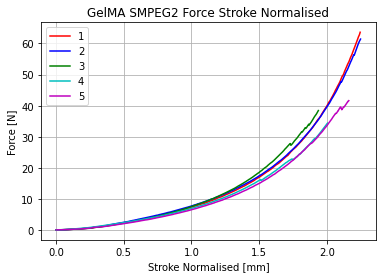

In [28]:
plt.plot(GelMA6_cut['Stroke Normalised'],GelMA6_cut['Force Cut Max FS'],color = 'r')
plt.plot(GelMA7_cut['Stroke Normalised'],GelMA7_cut['Force Cut Max FS'],color = 'b')
plt.plot(GelMA8_cut['Stroke Normalised'],GelMA8_cut['Force Cut Max FS'],color = 'g')
plt.plot(GelMA9_cut['Stroke Normalised'],GelMA9_cut['Force Cut Max FS'],color = 'c')
plt.plot(GelMA10_cut['Stroke Normalised'],GelMA10_cut['Force Cut Max FS'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA SMPEG2 Force Stroke Normalised')
plt.xlabel('Stroke Normalised [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA SMPEG2_FS_Cut.png")
plt.show()

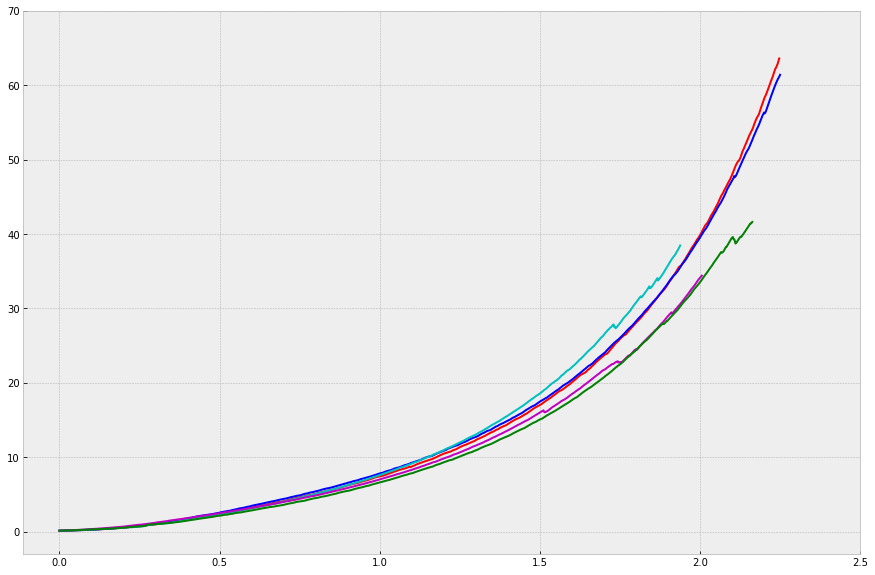

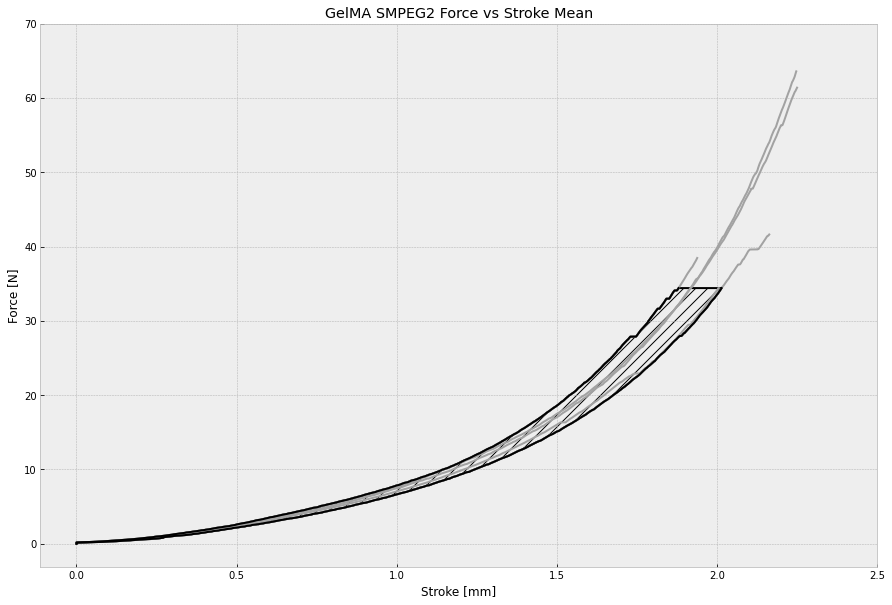

,xmin,xmax,y_common
0,0.0,0.0,0.000000
1,0.0,0.0,0.002333
2,0.0,0.0,0.004667
3,0.0,0.0,0.007000
4,0.0,0.0,0.009334
...,...,...,...
29995,NaN,NaN,69.990666
29996,NaN,NaN,69.993000
29997,NaN,NaN,69.995333
29998,NaN,NaN,69.997667


In [30]:
d1 = GelMA6_cut['Stroke Normalised']
d2 = GelMA7_cut['Stroke Normalised']
d3 = GelMA8_cut['Stroke Normalised']
d4 = GelMA9_cut['Stroke Normalised']
d5 = GelMA10_cut['Stroke Normalised']

y1 = GelMA6_cut['Force Cut Max FS']
y2 = GelMA7_cut['Force Cut Max FS']
y3 = GelMA8_cut['Force Cut Max FS']
y4 = GelMA9_cut['Force Cut Max FS']
y5 = GelMA10_cut['Force Cut Max FS']

y_common = np.linspace(0,70,30000)

x1 = np.interp(y_common,y1,d1)
x2 = np.interp(y_common,y2,d2)
x3 = np.interp(y_common,y3,d3)
x4 = np.interp(y_common,y4,d4)
x5 = np.interp(y_common,y5,d5)

x = np.stack((x1,x2,x3,x4,x5))

xmax = np.max(x,axis=0)
xmin = np.min(x,axis=0)

%matplotlib inline
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))

plt.plot(d1,y1,'red')
plt.plot(d2,y2,'blue')
plt.plot(d3,y3,'c')
plt.plot(d4,y4,'m')
plt.plot(d5,y5,'green')

plt.xticks(np.arange(0,2.6,0.5))
plt.yticks(np.arange(0,75,10))

plt.show()



fig = plt.figure(figsize=(15,10))

plt.plot(x1,y_common,'#A2A2A2')
plt.plot(x2,y_common,'#A2A2A2')
plt.plot(x3,y_common,'#A2A2A2')
plt.plot(x4,y_common,'#A2A2A2')
plt.plot(x5,y_common,'#A2A2A2')

plt.plot(xmax,y_common,'black')
plt.plot(xmin,y_common,'black')

plt.rcParams['hatch.color'] = 'black'
plt.fill_betweenx(y_common, xmax, xmin, facecolor='none', hatch ='//', edgecolor='black', linewidth=2)

plt.xticks(np.arange(0,2.6,0.5))
plt.yticks(np.arange(0,75,10))


plt.title('GelMA SMPEG2 Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
plt.savefig("GelMA SMPEG2_FS_Cut_Mean.png")

plt.show()

GelMA_SMPEG2_FS = {'xmin':xmin,
                  'xmax':xmax,
                'y_common':y_common}

GelMA_SMPEG2_FS_M = pd.DataFrame(GelMA_SMPEG2_FS) 

GelMA_SMPEG2_FS_M

#GelMA_SMPEG2_FS_M.to_csv('GelMA_SMPEG2_FS_M.csv')

### Stress Strain Plots (All)_Cut

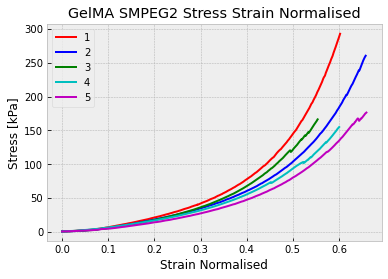

In [32]:
plt.plot(GelMA6_cut['Strain Normalised'],GelMA6_cut['Stress Cut Max SS'],color = 'r')
plt.plot(GelMA7_cut['Strain Normalised'],GelMA7_cut['Stress Cut Max SS'],color = 'b')
plt.plot(GelMA8_cut['Strain Normalised'],GelMA8_cut['Stress Cut Max SS'],color = 'g')
plt.plot(GelMA9_cut['Strain Normalised'],GelMA9_cut['Stress Cut Max SS'],color = 'c')
plt.plot(GelMA10_cut['Strain Normalised'],GelMA10_cut['Stress Cut Max SS'],color = 'm')
plt.grid(visible = True)
plt.legend('12345')
plt.title('GelMA SMPEG2 Stress Strain Normalised')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA SMPEG2_SS_Cut.png")
plt.show()

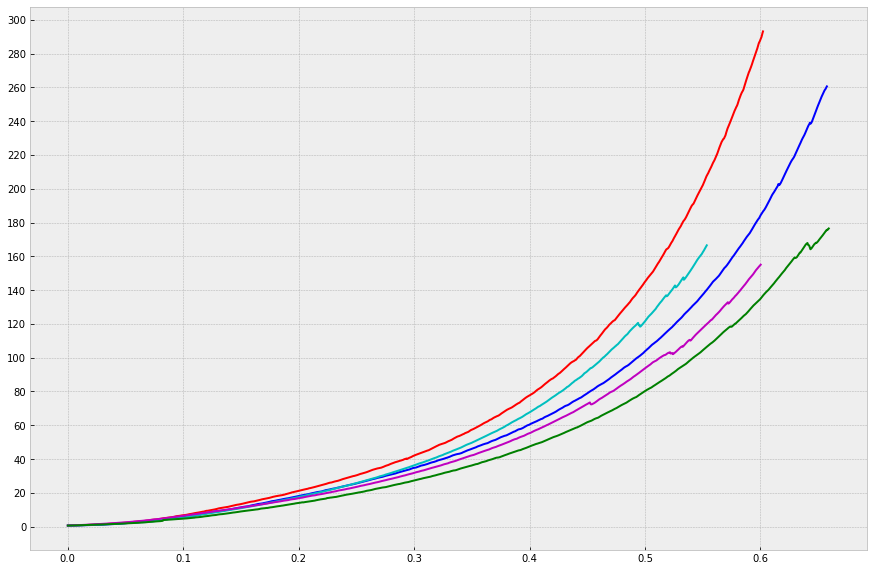

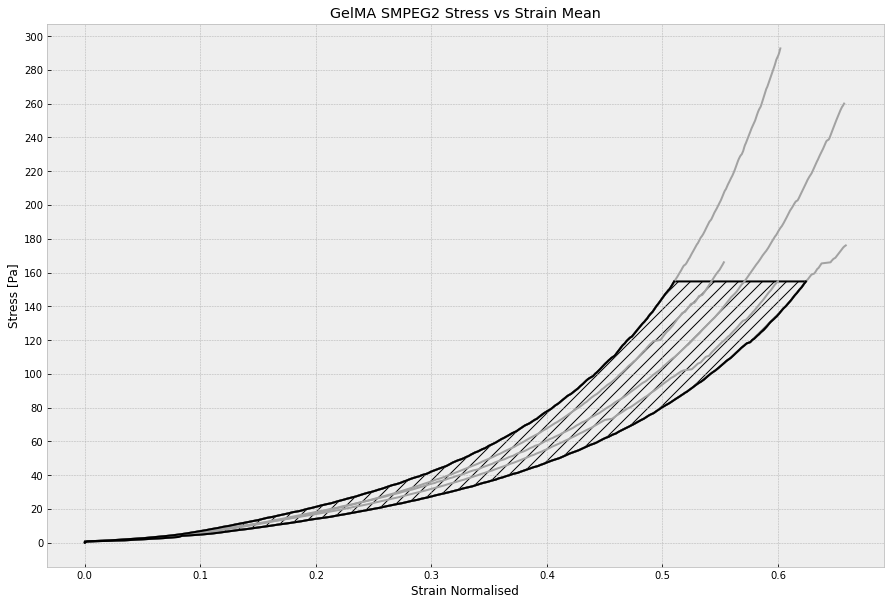

In [38]:
d6 = GelMA6_cut['Strain Normalised']
d7 = GelMA7_cut['Strain Normalised']
d8 = GelMA8_cut['Strain Normalised']
d9 = GelMA9_cut['Strain Normalised']
d10 = GelMA10_cut['Strain Normalised']

y6 = GelMA6_cut['Stress Cut Max SS']
y7 = GelMA7_cut['Stress Cut Max SS']
y8 = GelMA8_cut['Stress Cut Max SS']
y9 = GelMA9_cut['Stress Cut Max SS']
y10 = GelMA10_cut['Stress Cut Max SS']

#y_common_2 = np.linspace(0,2000000,30000) #Pa
y_common_2 = np.linspace(0,2000,3000) #kPa

x6 = np.interp(y_common_2,y6,d6)
x7 = np.interp(y_common_2,y7,d7)
x8 = np.interp(y_common_2,y8,d8)
x9 = np.interp(y_common_2,y9,d9)
x10 = np.interp(y_common_2,y10,d10)

x_2 = np.stack((x6,x7,x8,x9,x10))

xmax_2 = np.max(x_2,axis=0)
xmin_2 = np.min(x_2,axis=0)

%matplotlib inline
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))

plt.plot(d6,y6,'red')
plt.plot(d7,y7,'blue')
plt.plot(d8,y8,'c')
plt.plot(d9,y9,'m')
plt.plot(d10,y10,'green')

#plt.xticks(np.arange(0,0.65,0.1))
#plt.yticks(np.arange(0,300100,20000))

plt.xticks(np.arange(0,0.65,0.1))
plt.yticks(np.arange(0,320,20))

plt.show()



fig = plt.figure(figsize=(15,10))

plt.plot(x6,y_common_2,'#A2A2A2')
plt.plot(x7,y_common_2,'#A2A2A2')
plt.plot(x8,y_common_2,'#A2A2A2')
plt.plot(x9,y_common_2,'#A2A2A2')
plt.plot(x10,y_common_2,'#A2A2A2')

plt.plot(xmax_2,y_common_2,'black')
plt.plot(xmin_2,y_common_2,'black')

plt.rcParams['hatch.color'] = 'black'
plt.fill_betweenx(y_common_2, xmax_2, xmin_2, facecolor='none', hatch ='//', edgecolor='black', linewidth=2)

#plt.xticks(np.arange(0,0.65,0.1))
#plt.yticks(np.arange(0,300100,20000))

plt.xticks(np.arange(0,0.65,0.1))
plt.yticks(np.arange(0,320,20))

plt.title('GelMA SMPEG2 Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
plt.savefig("GelMA SMPEG2_SS_Cut_Mean.png")

plt.show()

GelMA_SMPEG2_SS = {'xmin':xmin_2,
                  'xmax':xmax_2,
                'y_common':y_common_2}


GelMA_SMPEG2_SS_M = pd.DataFrame(GelMA_SMPEG2_SS) 

GelMA_SMPEG2_SS_M

GelMA_SMPEG2_SS_M.to_csv('GelMA_SMPEG2_SS_M.csv')

## Mean of the samples 

### Force_stroke Mean 

In [80]:
All_GelMA_force = {'GelMA6':GelMA6_cut['Force Cut Max FS'], 
                     'GelMA7':GelMA7_cut['Force Cut Max FS'], 
                     'GelMA8':GelMA8_cut['Force Cut Max FS'], 
                     'GelMA9':GelMA9_cut['Force Cut Max FS'],
                    'GelMA10':GelMA10_cut['Force Cut Max FS']}

All_GelMA_stroke = {'GelMA6':GelMA6_cut['Stroke Normalised'], 
                     'GelMA7':GelMA7_cut['Stroke Normalised'], 
                     'GelMA8':GelMA8_cut['Stroke Normalised'], 
                     'GelMA9':GelMA9_cut['Stroke Normalised'],
                    'GelMA10':GelMA10_cut['Stroke Normalised']}

All_GelMA_force
All_GelMA_stroke

df2_force = pd.DataFrame (data = All_GelMA_force)
df2_stroke = pd.DataFrame (data = All_GelMA_stroke)

#df2_force
#df2_stroke

GelMA_force_mean = df2_force.mean(axis=1)
GelMA_stroke_mean = df2_stroke.mean(axis=1)

#GelMA_force_mean

df2_GelMA_SMPEG2_FS = {'GelMA Force Mean':GelMA_force_mean,
                  'GelMA Stroke Mean':GelMA_stroke_mean}

GelMA_SMPEG2_FS_M = pd.DataFrame(df2_GelMA_SMPEG2_FS) 

#GelMA_SMPEG2_FS_M

#GelMA_SMPEG2_FS_M.to_csv('GelMA_SMPEG2_FS_M.csv')

from numpy import array

F = array([All_GelMA_force[k] for k in All_GelMA_force]).mean(axis=0)

Strk = array([All_GelMA_stroke[k] for k in All_GelMA_stroke]).mean(axis=0)




from math import nan, isnan

F_nan = [x for x in F if isnan(x) == False]
F1 = pd.DataFrame(F_nan)

FStd = array(pd.DataFrame(All_GelMA_force).std(numeric_only = True, axis = 1))
F_nan_std = [x for x in FStd if isnan(x) == False]


F1['Std'] = pd.DataFrame(F_nan_std)
F1.columns = ['Mean', 'Std']

F1['Mean'] = F1['Mean'] - F1.iloc[0]['Mean']


F1['Error1'] = F1['Mean'] - F1['Std']
F1['Error2'] = F1['Mean'] + F1['Std']




Strk_nan = [x for x in Strk if isnan(x) == False]
Strk1 = pd.DataFrame(Strk_nan)

StrkStd = array(pd.DataFrame(All_GelMA_stroke).std(numeric_only = True, axis = 1))
Strk_nan_std = [x for x in StrkStd if isnan(x) == False]

Strk1['Std'] = pd.DataFrame(Strk_nan_std)
Strk1.columns = ['Mean', 'Std']

Strk1['Error1'] = Strk1['Mean'] - Strk1['Std']
Strk1['Error2'] = Strk1['Mean'] + Strk1['Std']



#Strk1['Mean'] = Strk1['Mean'] - Strk1.iloc[0]['Mean'] #to zero
maxForcemean = float(F1['Mean'].idxmax()) #position; same shape as force

Strk1['Mean'] = Strk1.loc[0:maxForcemean, 'Mean']
Strk1['Std'] = Strk1.loc[0:maxForcemean, 'Std']
Strk1['Error1'] = Strk1.loc[0:maxForcemean, 'Error1']
Strk1['Error2'] = Strk1.loc[0:maxForcemean, 'Error2']

Strk1 = Strk1[Strk1['Mean'].notnull()]
Strk1

#F1
#Strk1


#F1.to_csv('F1_SMPEG2.csv')
#Strk1.to_csv('Strk1_SMPEG2.csv')

df2_force['s6'] = df2_stroke['GelMA6']
df2_force['s7'] = df2_stroke['GelMA7']
df2_force['s8'] = df2_stroke['GelMA8']
df2_force['s9'] = df2_stroke['GelMA9']
df2_force['s10'] = df2_stroke['GelMA10']

df2_force

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/2937230404.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F = array([All_GelMA_force[k] for k in All_GelMA_force]).mean(axis=0)
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1839/2937230404.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Strk = array([All_GelMA_stroke[k] for k in All_GelMA_stroke]).mean(axis=0)


,GelMA6,GelMA7,GelMA8,GelMA9,GelMA10,s6,s7,s8,s9,s10
1936,NaN,NaN,NaN,0.150124,NaN,NaN,NaN,NaN,0.000000,NaN
1937,NaN,NaN,NaN,0.150839,NaN,NaN,NaN,NaN,0.000133,NaN
1938,NaN,NaN,NaN,0.150045,NaN,NaN,NaN,NaN,0.000300,NaN
1940,NaN,NaN,NaN,0.150283,NaN,NaN,NaN,NaN,0.000600,NaN
1941,NaN,NaN,NaN,0.152191,NaN,NaN,NaN,NaN,0.000767,NaN
...,...,...,...,...,...,...,...,...,...,...
17527,NaN,NaN,NaN,NaN,NaN,2.356300,NaN,NaN,NaN,NaN
17528,NaN,NaN,NaN,NaN,NaN,2.356467,NaN,NaN,NaN,NaN
17529,NaN,NaN,NaN,NaN,NaN,2.356600,NaN,NaN,NaN,NaN
17530,NaN,NaN,NaN,NaN,NaN,2.356700,NaN,NaN,NaN,NaN


In [81]:
#Force

G6 = [x for x in df2_force['GelMA6'] if isnan(x) == False]
G7 = [x for x in df2_force['GelMA7'] if isnan(x) == False]
G8 = [x for x in df2_force['GelMA8'] if isnan(x) == False]
G9 = [x for x in df2_force['GelMA9'] if isnan(x) == False]
G10 = [x for x in df2_force['GelMA10'] if isnan(x) == False]

#Stroke

G11 = [x for x in df2_force['s6'] if isnan(x) == False]
G12 = [x for x in df2_force['s7'] if isnan(x) == False]
G13 = [x for x in df2_force['s8'] if isnan(x) == False]
G14 = [x for x in df2_force['s9'] if isnan(x) == False]
G15 = [x for x in df2_force['s10'] if isnan(x) == False]


dfG6 = pd.DataFrame(G6)
dfG7 = pd.DataFrame(G7)
dfG8 = pd.DataFrame(G8)
dfG9 = pd.DataFrame(G9)
dfG10 = pd.DataFrame(G10)

dfG11 = pd.DataFrame(G11)
dfG12 = pd.DataFrame(G12)
dfG13 = pd.DataFrame(G13)
dfG14 = pd.DataFrame(G14)
dfG15 = pd.DataFrame(G15)



dFONLY = dfG6
dFONLY['7'] = dfG7
dFONLY['8'] = dfG8
dFONLY['9'] = dfG9
dFONLY['10'] = dfG10

dFONLY['11'] = dfG11
dFONLY['12'] = dfG12
dFONLY['13'] = dfG13
dFONLY['14'] = dfG14
dFONLY['15'] = dfG15




dFONLY.columns = ['F6','F7','F8','F9','F10','S6','S7','S8','S9','S10']
dFONLY

#df2 = dFONLY[['F6','F7','F8','F9','F10']]
#ds2 = dFONLY[['S6','S7','S8','S9','S10']]

dFONLY

len(dfG8) #8, shorter one

############# df = df.iloc[row_start:row_end , col_start, col_end]

dFONLY = dFONLY.iloc[0:11623, :]
dFONLY

df2 = dFONLY[['F6','F7','F8','F9','F10']]
ds2 = dFONLY[['S6','S7','S8','S9','S10']]


df2



,F6,F7,F8,F9,F10
0,0.150045,0.150124,0.150283,0.150124,0.150045
1,0.150045,0.150522,0.151237,0.150839,0.150522
2,0.150045,0.150680,0.151873,0.150045,0.150442
3,0.151078,0.150283,0.151237,0.150283,0.150442
4,0.152191,0.151873,0.151396,0.152191,0.151475
...,...,...,...,...,...
11618,35.736560,35.502200,38.410820,30.597850,30.247050
11619,35.744030,35.513560,38.427190,30.608260,30.257140
11620,35.751740,35.524450,38.444040,30.617870,30.267480
11621,35.758580,35.535260,38.458430,30.626140,30.277890


In [82]:
F_dF = array([df2[k] for k in df2]).mean(axis = 0)
S_dF = array([ds2[k] for k in ds2]).mean(axis = 0)


F1 = pd.DataFrame(F_dF) #force
Strk1 = pd.DataFrame(S_dF) #stroke


FStd = array(pd.DataFrame(df2).std(numeric_only = True, axis = 1))
F_nan_std = [x for x in FStd if isnan(x) == False]

StrkStd = array(pd.DataFrame(ds2).std(numeric_only = True, axis = 1))
Strk_nan_std = [x for x in StrkStd if isnan(x) == False]


F1['Std'] = pd.DataFrame(F_nan_std)
F1.columns = ['Mean', 'Std']

Strk1['Std'] = pd.DataFrame(Strk_nan_std)
Strk1.columns = ['Mean', 'Std']



F1['Error1'] = F1['Mean'] - F1['Std']
F1['Error2'] = F1['Mean'] + F1['Std']


Strk1['Error1'] = Strk1['Mean'] - Strk1['Std']
Strk1['Error2'] = Strk1['Mean'] + Strk1['Std']


F1, Strk1




(            Mean       Std     Error1     Error2
 0       0.150124  0.000097   0.150027   0.150222
 1       0.150633  0.000441   0.150192   0.151074
 2       0.150617  0.000753   0.149864   0.151370
 3       0.150665  0.000458   0.150207   0.151123
 4       0.151825  0.000379   0.151445   0.152204
 ...          ...       ...        ...        ...
 11618  34.098896  3.547462  30.551434  37.646358
 11619  34.110036  3.549115  30.560921  37.659151
 11620  34.121116  3.551028  30.570088  37.672144
 11621  34.131260  3.552398  30.578862  37.683658
 11622  34.138950  3.551296  30.587654  37.690246
 
 [11623 rows x 4 columns],
            Mean       Std    Error1    Error2
 0      0.000000  0.000000  0.000000  0.000000
 1      0.000700  0.000870 -0.000170  0.001570
 2      0.000887  0.000950 -0.000063  0.001837
 3      0.001113  0.000919  0.000194  0.002032
 4      0.001513  0.000766  0.000748  0.002279
 ...         ...       ...       ...       ...
 11618  1.937527  0.000931  1.936596  1.93

### Stress_Strain Mean 

In [83]:
All_GelMA_stress = {'GelMA6':GelMA6_cut['Stress Cut Max SS'], 
                     'GelMA7':GelMA7_cut['Stress Cut Max SS'], 
                     'GelMA8':GelMA8_cut['Stress Cut Max SS'], 
                     'GelMA9':GelMA9_cut['Stress Cut Max SS'],
                    'GelMA10':GelMA10_cut['Stress Cut Max SS']}

All_GelMA_strain = {'GelMA6':GelMA6_cut['Strain Normalised'], 
                     'GelMA7':GelMA7_cut['Strain Normalised'], 
                     'GelMA8':GelMA8_cut['Strain Normalised'], 
                     'GelMA9':GelMA9_cut['Strain Normalised'],
                    'GelMA10':GelMA10_cut['Strain Normalised']}

All_GelMA_stress
All_GelMA_strain

df2_stress = pd.DataFrame(All_GelMA_stress)
df2_strain = pd.DataFrame(All_GelMA_strain)

#df2_stress
#df2_strain

#GelMA_stress_mean = df2_stress.mean(axis = 1)
#GelMA_strain_mean = df2_strain.mean(axis = 1)

#GelMA_stress_mean

#df2_GelMA_SMPEG2_SS = {'GelMA Force Mean':GelMA_stress_mean,
#                  'GelMA Stroke Mean':GelMA_strain_mean}

#GelMA_SMPEG2_SS_M = pd.DataFrame(df2_GelMA_SMPEG2_SS) 
#

#GelMA_SMPEG2_SS_M

#GelMA_SMPEG2_SS_M.to_csv('GelMA_SMPEG2_SS_M.csv')

#S = array([All_GelMA_stress[k] for k in All_GelMA_stress]).mean()

#Strn = array([All_GelMA_strain[k] for k in All_GelMA_strain]).mean()


from math import nan, isnan

#S_nan = [x for x in S if isnan(x) == False]

#S1 = pd.DataFrame(S_nan)

#SStd = array(pd.DataFrame(All_GelMA_stress).std(numeric_only = True, axis = 1))
#S_nan_std = [x for x in SStd if isnan(x) == False]


#S1['Std'] = pd.DataFrame(S_nan_std)
#S1.columns = ['Mean', 'Std']

#S1['Mean'] = S1['Mean'] - S1.iloc[0]['Mean']

#S1['Error1'] = S1['Mean'] - S1['Std']
#S1['Error2'] = S1['Mean'] + S1['Std']


#Strain_nan = [x for x in Strn if isnan(x) == False]
#Strn1 = pd.DataFrame(Strain_nan)

#StrnStd = array(pd.DataFrame(All_GelMA_strain).std(numeric_only = True, axis = 1))
#Strn_nan_std = [x for x in StrnStd if isnan(x) == False]

#Strn1['Std'] = pd.DataFrame(Strn_nan_std)
#Strn1.columns = ['Mean', 'Std']

#Strn1['Error1'] = Strn1['Mean'] - Strn1['Std']
#Strn1['Error2'] = Strn1['Mean'] + Strn1['Std']



#Strn1['Mean'] = Strn1['Mean'] - Strn1.iloc[0]['Mean'] #to zero
#maxStressmean = float(S1['Mean'].idxmax()) #position; same shape as force

#Strn1['Mean'] = Strn1.loc[0:maxStressmean, 'Mean']
#Strn1['Std'] = Strn1.loc[0:maxStressmean, 'Std']
#Strn1['Error1'] = Strn1.loc[0:maxStressmean, 'Error1']
#Strn1['Error2'] = Strn1.loc[0:maxStressmean, 'Error2']

#Strn1 = Strn1[Strn1['Mean'].notnull()]
#Strn1

#S1

#Strn1

#S1.to_csv('S1_SMPEG2.csv')
#Strn1.to_csv('Strn1_SMPEG2.csv')

df2_stress['sn6'] = df2_strain['GelMA6']
df2_stress['sn7'] = df2_strain['GelMA7']
df2_stress['sn8'] = df2_strain['GelMA8']
df2_stress['sn9'] = df2_strain['GelMA9']
df2_stress['sn10'] = df2_strain['GelMA10']

df2_stress

,GelMA6,GelMA7,GelMA8,GelMA9,GelMA10,sn6,sn7,sn8,sn9,sn10
1936,NaN,NaN,NaN,0.676434,NaN,NaN,NaN,NaN,0.00000,NaN
1937,NaN,NaN,NaN,0.679657,NaN,NaN,NaN,NaN,0.00004,NaN
1938,NaN,NaN,NaN,0.676076,NaN,NaN,NaN,NaN,0.00009,NaN
1940,NaN,NaN,NaN,0.677150,NaN,NaN,NaN,NaN,0.00018,NaN
1941,NaN,NaN,NaN,0.685744,NaN,NaN,NaN,NaN,0.00023,NaN
...,...,...,...,...,...,...,...,...,...,...
17527,NaN,NaN,NaN,NaN,NaN,0.631716,NaN,NaN,NaN,NaN
17528,NaN,NaN,NaN,NaN,NaN,0.631761,NaN,NaN,NaN,NaN
17529,NaN,NaN,NaN,NaN,NaN,0.631796,NaN,NaN,NaN,NaN
17530,NaN,NaN,NaN,NaN,NaN,0.631823,NaN,NaN,NaN,NaN


In [84]:
#Stress

G6ss = [x for x in df2_stress['GelMA6'] if isnan(x) == False]
G7ss = [x for x in df2_stress['GelMA7'] if isnan(x) == False]
G8ss = [x for x in df2_stress['GelMA8'] if isnan(x) == False]
G9ss = [x for x in df2_stress['GelMA9'] if isnan(x) == False]
G10ss = [x for x in df2_stress['GelMA10'] if isnan(x) == False]

#Strain

G11ss = [x for x in df2_stress['sn6'] if isnan(x) == False]
G12ss = [x for x in df2_stress['sn7'] if isnan(x) == False]
G13ss = [x for x in df2_stress['sn8'] if isnan(x) == False]
G14ss = [x for x in df2_stress['sn9'] if isnan(x) == False]
G15ss = [x for x in df2_stress['sn10'] if isnan(x) == False]


dfG6ss = pd.DataFrame(G6ss)
dfG7ss = pd.DataFrame(G7ss)
dfG8ss = pd.DataFrame(G8ss)
dfG9ss = pd.DataFrame(G9ss)
dfG10ss = pd.DataFrame(G10ss)

dfG11ss = pd.DataFrame(G11ss)
dfG12ss = pd.DataFrame(G12ss)
dfG13ss = pd.DataFrame(G13ss)
dfG14ss = pd.DataFrame(G14ss)
dfG15ss = pd.DataFrame(G15ss)



dFONLYss = dfG6ss
dFONLYss['7'] = dfG7ss
dFONLYss['8'] = dfG8ss
dFONLYss['9'] = dfG9ss
dFONLYss['10'] = dfG10ss

dFONLYss['11'] = dfG11ss
dFONLYss['12'] = dfG12ss
dFONLYss['13'] = dfG13ss
dFONLYss['14'] = dfG14ss
dFONLYss['15'] = dfG15ss




dFONLYss.columns = ['Ss6','Ss7','Ss8','Ss9','Ss10','Sn6','Sn7','Sn8','Sn9','Sn10']
dFONLYss

#dss2 = dFONLYss[['Ss6','Ss7','Ss8','Ss9','Ss10']]
#dsn2 = dFONLYss[['Sn6','Sn7','Sn8','Sn9','Sn10']]


len(dfG8ss) #8, shorter one

############# df = df.iloc[row_start:row_end , col_start, col_end]

dFONLYss = dFONLYss.iloc[0:11623, :]
dFONLYss

dss2 = dFONLYss[['Ss6','Ss7','Ss8','Ss9','Ss10']]
dsn2 = dFONLYss[['Sn6','Sn7','Sn8','Sn9','Sn10']]

dss2

,Ss6,Ss7,Ss8,Ss9,Ss10
0,0.691622,0.637184,0.650567,0.676434,0.636113
1,0.691622,0.638871,0.654695,0.679657,0.638134
2,0.691622,0.639545,0.657448,0.676076,0.637797
3,0.696384,0.637859,0.654695,0.677150,0.637797
4,0.701513,0.644605,0.655384,0.685744,0.642177
...,...,...,...,...,...
11618,164.725496,150.684857,166.278251,137.868675,128.231882
11619,164.759929,150.733073,166.349116,137.915581,128.274659
11620,164.795468,150.779294,166.422059,137.958882,128.318495
11621,164.826996,150.825176,166.484352,137.996145,128.362628


In [85]:
S_dF = array([dss2[k] for k in dss2]).mean(axis = 0)
Strn_dF = array([dsn2[k] for k in dsn2]).mean(axis = 0)


S1 = pd.DataFrame(S_dF) #stress
Strn1 = pd.DataFrame(Strn_dF) #strain

SStd = array(pd.DataFrame(dss2).std(numeric_only = True, axis = 1))
S_nan_std = [x for x in SStd if isnan(x) == False]

StrnStd = array(pd.DataFrame(dsn2).std(numeric_only = True, axis = 1))
Strn_nan_std = [x for x in StrnStd if isnan(x) == False]


S1['Std'] = pd.DataFrame(S_nan_std)
S1.columns = ['Mean', 'Std']

Strn1['Std'] = pd.DataFrame(Strn_nan_std)
Strn1.columns = ['Mean', 'Std']



S1['Error1'] = S1['Mean'] - S1['Std']
S1['Error2'] = S1['Mean'] + S1['Std']


Strn1['Error1'] = Strn1['Mean'] - Strn1['Std']
Strn1['Error2'] = Strn1['Mean'] + Strn1['Std']

S1



,Mean,Std,Error1,Error2
0,0.658384,0.024684,0.633700,0.683068
1,0.660596,0.024173,0.636423,0.684769
2,0.660498,0.023319,0.637179,0.683817
3,0.660777,0.025624,0.635154,0.686401
4,0.665885,0.026405,0.639480,0.692290
...,...,...,...,...
11618,149.557832,16.600701,132.957131,166.158534
11619,149.606472,16.605239,133.001233,166.211710
11620,149.654840,16.610822,133.044017,166.265662
11621,149.699060,16.613776,133.085284,166.312835


In [89]:
#F1.to_csv('F1_SMPEG2.csv')
#Strk1.to_csv('Strk1_SMPEG2.csv')
#S1.to_csv('S1_SMPEG2.csv')
#Strn1.to_csv('Strn1_SMPEG2.csv')

## Plotting the stress and force means

### Force_Stroke Mean plotting

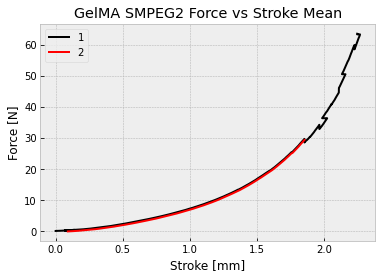

In [65]:
plt.plot(GelMA_stroke_mean, GelMA_force_mean,color = 'k')
plt.plot(Strk1['Mean'], F1['Mean'], color= 'r')
#plt.plot(Strk1['Mean'], F1['Mean'], color= 'r')
plt.grid(visible=True)
plt.legend('12')
plt.title('GelMA SMPEG2 Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA SMPEG2_FS Mean.png")
plt.show()

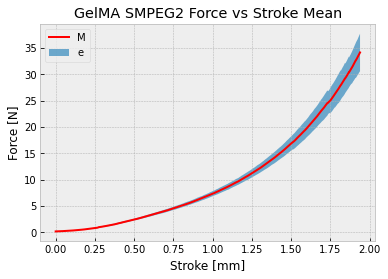

In [86]:
plt.plot(Strk1['Mean'], F1['Mean'], color= 'r')
plt.fill_between(Strk1['Mean'], F1['Error1'], F1['Error2'], alpha = 0.7)
plt.grid(visible=True)
plt.legend('Mean')
plt.title('GelMA SMPEG2 Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA SMPEG2_FS Mean_error.png")
plt.show()

### Stress_Strain Mean plotting 

NameError: name 'GelMA_strain_mean' is not defined

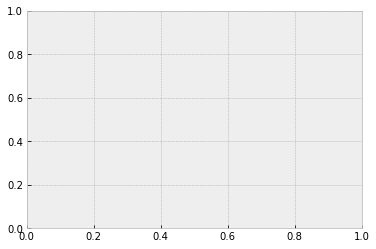

In [58]:
#plt.figure(figsize =(15,10))
plt.grid(visible=True)
plt.plot(GelMA_strain_mean, GelMA_stress_mean,color = 'k')
plt.plot(GelMA_strain_mean, S,color = 'r')
plt.legend('12')
plt.title('GelMA SMPEG2 Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
#plt.savefig("GelMA SMPEG2_SS Mean.png")
plt.show()

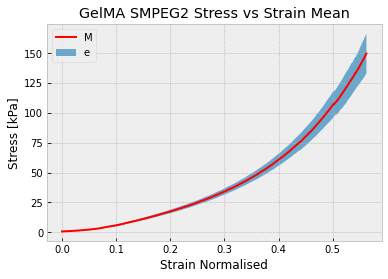

In [87]:
plt.plot(Strn1['Mean'], S1['Mean'], color= 'r')
plt.fill_between(Strn1['Mean'], S1['Error1'], S1['Error2'], alpha = 0.7)
plt.grid(visible=True)
plt.legend('Mean')
plt.title('GelMA SMPEG2 Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA SMPEG2_SS Mean_error.png")
plt.show()

# Margin of Error

## Force_Stroke Margin Error

In [117]:
def error_margin_fs (mean):
    a = 0.001/mean #1mm = 0.001m
    return (1 +- a)*mean

In [118]:
GelMA_SMPEG2_Error_FS = error_margin_fs(GelMA_stroke_mean)

In [119]:
df2_GelMA_SMPEG2_Er = {'GelMA Force Mean':GelMA_force_mean,
                  'GelMA Stroke Mean':GelMA_stroke_mean,
                    'GelMA Error Margin':GelMA_SMPEG2_Error_FS}

dfF_GelMA_SMPEG2_Er = {'GelMA Force Mean':F,
                  'GelMA Stroke Mean':GelMA_stroke_mean,
                    'GelMA Error Margin':GelMA_SMPEG2_Error_FS}

GelMA_SMPEG2_Er = pd.DataFrame(dfF_GelMA_SMPEG2_Er) 

GelMA_SMPEG2_Er

GelMA_SMPEG2_Er.to_csv('GelMA_SMPEG2_Er.csv')

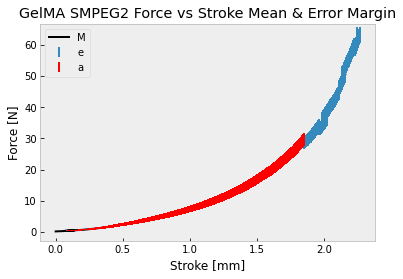

In [120]:
plt.plot(GelMA_stroke_mean, GelMA_force_mean,color = 'k')
plt.errorbar(GelMA_stroke_mean, GelMA_force_mean, yerr = GelMA_SMPEG2_Error_FS, fmt = ' ')
plt.errorbar(GelMA_stroke_mean, F, yerr = GelMA_SMPEG2_Error_FS, fmt = ' ', color = 'r')

plt.grid()
plt.legend('Mean')
plt.title('GelMA SMPEG2 Force vs Stroke Mean & Error Margin')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
plt.savefig("GelMA SMPEG2_FS Mean_Error.png")
plt.show()

## Stress_Strain Margin Error

In [121]:
GelMA_D_Mean
GelMA_A_Mean

b= 0.001/GelMA_D_Mean

def error_margin_ss (force):
    from scipy import stats
    a = force/((1+2*b)*GelMA_A_Mean)
    c = force/((1-2*b)*GelMA_A_Mean)
    return (a,c)

In [122]:
error_margin_ss(F)

(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

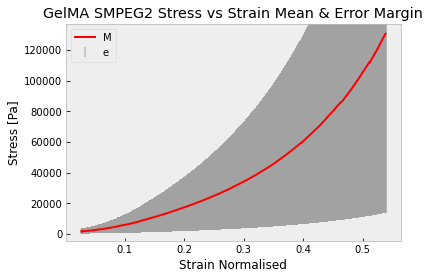

In [123]:
plt.errorbar(GelMA_strain_mean, S, yerr = error_margin_ss(F), fmt = ' ', color = '#A2A2A2', alpha = 0.5)
plt.plot(GelMA_strain_mean, S,color = 'r')

plt.grid()
plt.legend('Mean')
plt.title('GelMA SMPEG2 Stress vs Strain Mean & Error Margin')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
#plt.savefig("GelMA SMPEG2_SS Mean_Error.png")
plt.show()